In [1]:
generate_normal_distribution <- function(lambda = 2, t = 50, x) {
  nd <- (((lambda * t) ^ x) / factorial(x)) * exp(- lambda * t)
  return(nd)
}

generate_U <- function(c, mu, U0, n, tau) {
  U <- numeric(n)
  U[1] <- U0
  for (j in 2:n) {
    U[j] <- U[j-1] + c * tau[j] - rexp(1, mu)
  }
  return(U)
}

generate_T <- function(n, tau) {
  T <- numeric(n)
  T[1] <- tau[1]
  for (i in 2:n) {
    T[i] <- T[i-1] + tau[i]
  }
  return(T)
}

ksi <- function(tr, c, p, U0) {
  if (sum(generate_U(c, tr, p, U0,tau) < 0) > 0) {
    return(1)
  } else {
    return(0)
  }
}

# 1 

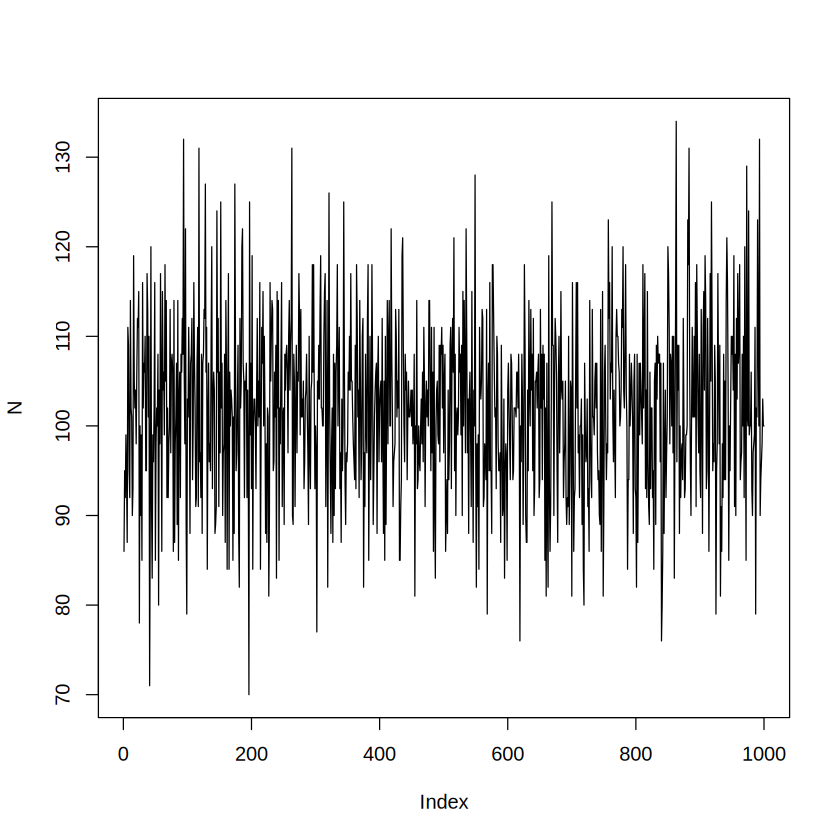

In [2]:
T <- 50
lambda <- 2

N <- numeric(1000)

for (i in 1:1000) {    
    tau <- numeric(0)    
    tmp <- 0 
    while (sum(tau) < T) {
        tmp <- tmp + 1
        tau[tmp] <- sum(rexp(1, lambda))
    }
    N[i] <- tmp
}

plot(N, type = "l")

# 2

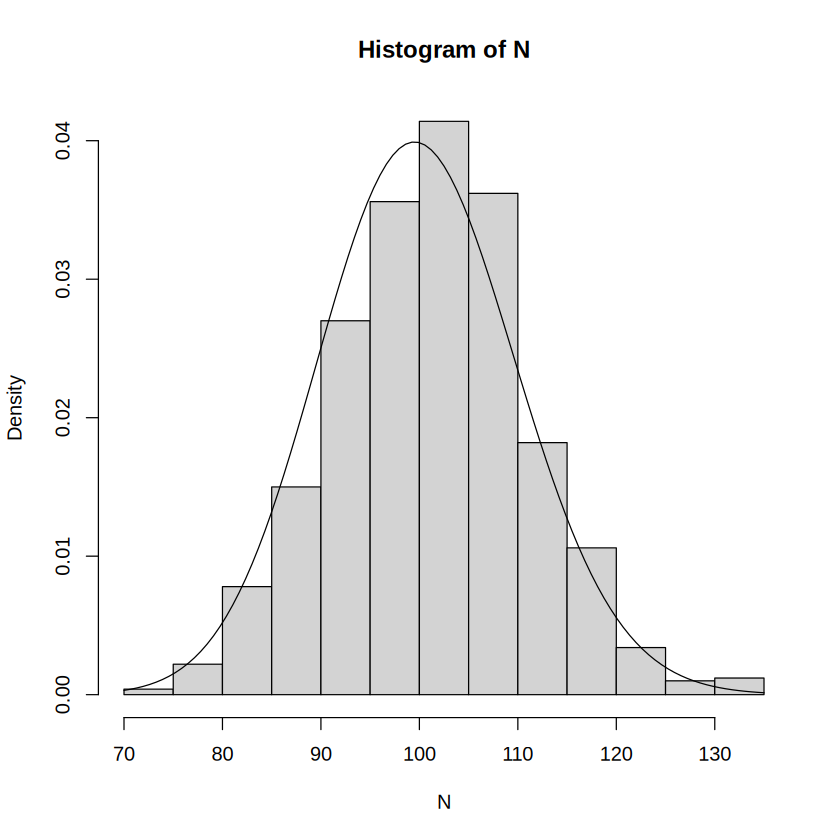

In [3]:
x <- 1:max(N)

hist(N, freq = FALSE)
curve(generate_normal_distribution(x = x), add = TRUE)

# 3

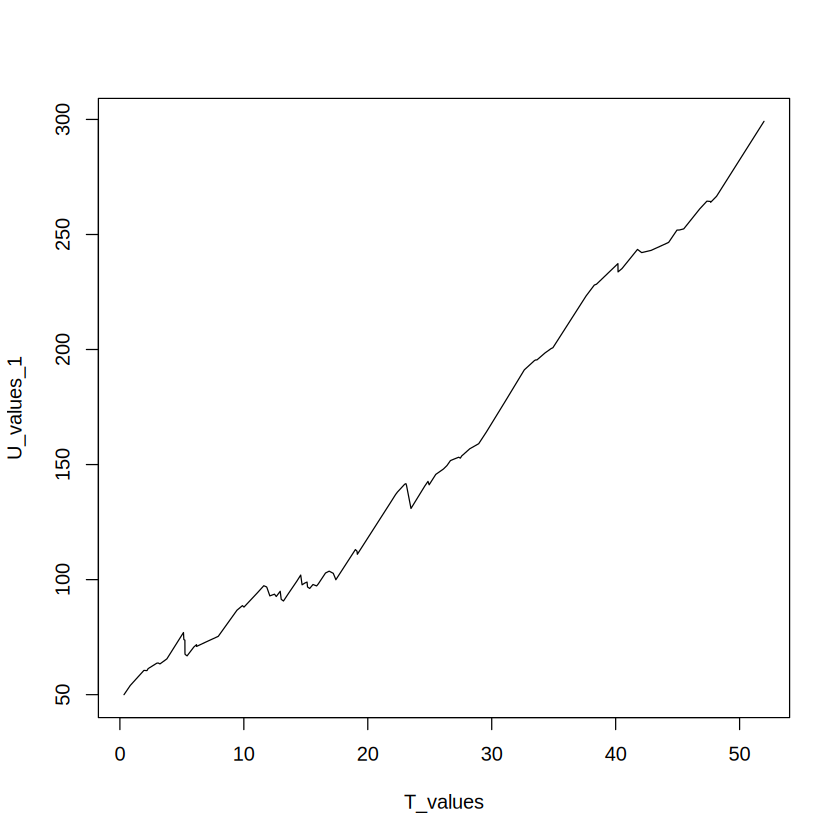

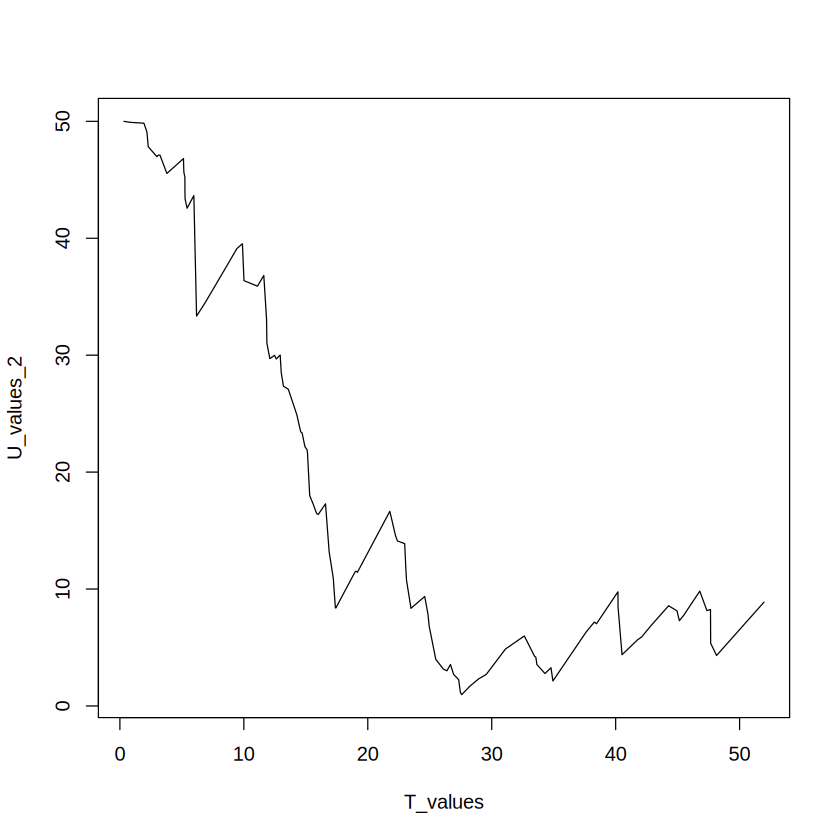

In [4]:
U_values_1 <- generate_U(9, 0.4, 50, length(N), tau)
U_values_2 <- generate_U(2, 0.7, 50, length(N), tau)

T_values <- generate_T(length(N), tau)

plot(U_values_1 ~ T_values, type = 'l')
plot(U_values_2 ~ T_values, type = 'l')

# 4

In [5]:
t_max <- 1000
lambda <- .3

N <- numeric(t_max)

for (i in 1:t_max) {    
    tau <- numeric(0)    
    tmp <- 0 
    while (sum(tau) < t_max) {
        tmp <- tmp + 1
        tau[tmp] <- sum(rexp(1, lambda))
    }
    N[i] <- tmp
}


In [6]:
c <- 1
mu <- 3
U0 <- 100

In [7]:
rho <- (c / ( lambda * mu )) - 1
rho

[1] 0.1111111

In [8]:
n <- 1000
t <- 1000

tr <- N

Xi_A <- 0
for (i in 1:n) {
  Xi_A <- Xi_A + ksi(tr[i], c, 1/mu, U0) / n
}
Xi_A
exp(- 1/mu * rho * U0 / (1 + rho))


[1] 0

[1] 0.03567399